In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [2]:
data = pd.read_csv('SemEval2017-task4-dev.subtask-A.english.INPUT.txt', names = ['id', 'label', 'content'], sep ='\t', index_col=False)
data_bu = data

In [3]:
data.head()

,id,label,content
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...


In [4]:
#remove stop words, after tokenization
stop_words=set(stopwords.words("english"))
stop_words.remove('not')
snowBallStemmer = SnowballStemmer("english")

In [5]:
#tokenization
#steming
#tokenized_df = pd.DataFrame(columns=['id', 'label',])
# for i in range(data.shape[0]):
#     sample = data.loc[i]['content'].lower()
#     token1 = word_tokenize(sample)
#     token2 =[]
#     for tk in token1:
#         if tk in stop_words:
#             token1.remove(tk)
#         else:
#             token2.append(re.sub('[^a-zA-Z\s]', '', tk))
#     token2 = list(filter(lambda a: a not in ['', 's'], token2))
#     stemWords = [snowBallStemmer.stem(word) for word in token2]
#     data.at[i, 'content'] = stemWords

In [39]:
# from nltk import pos_tag

In [76]:
# ps = pos_tag(r)

In [82]:
# delete_list = ['NNP', 'PRP']

In [78]:
# nltk.help.upenn_tagset('PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


In [33]:

# data = pd.read_csv('SemEval2017-task4-dev.subtask-A.english.INPUT.txt', names = ['id', 'label', 'content'], sep ='\t', index_col=False)

In [6]:
data.label.value_counts()

neutral     10342
positive     7059
negative     3231
Name: label, dtype: int64

In [7]:
import matplotlib.pyplot as plt
from nltk import pos_tag

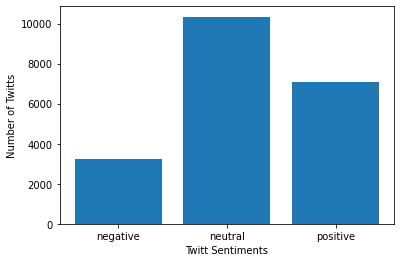

In [8]:
Sentiment_count=data.groupby('label').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'])
plt.xlabel('Twitt Sentiments')
plt.ylabel('Number of Twitts')
plt.show()

In [9]:
#pre process : remove delete list
# delete_list = ['NNP', 'PRP']
# for d in range(data.shape[0]):
#     #print(d)
#     sen = ''
#     r = word_tokenize(data.loc[d]['content'])
#     ps = pos_tag(r)
#     for i in ps:
#     #print(d)
#         if i[1] not in delete_list:
#             sen += i[0] + ' '
#     data.at[d, 'content'] = sen

In [9]:
# data.head()

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,4),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['content'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['label'], test_size=0.3, random_state=1)

In [12]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5959612277867529


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)

In [18]:
result = dt.fit(X_train, y_train)

In [19]:
pre = result.predict(X_test)

In [20]:
print("DT Accuracy:",metrics.accuracy_score(y_test, pre))

DT Accuracy: 0.5350565428109855


In [ ]:
#KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [23]:
model = knn.fit(X_train, y_train)

In [24]:
knn.score(X_train, y_train)

0.7043345796981028

In [25]:
knn.score(X_test, y_test)

0.5610662358642973

In [26]:
pre = knn.predict(X_test)

In [27]:
print(metrics.accuracy_score(y_test, pre))

0.5610662358642973


In [ ]:
#RNN

In [28]:
token_df = pd.DataFrame(columns=['id', 'label', 'content'])
word_list = []

In [29]:
#remove stop words, after tokenization
stop_words=set(stopwords.words("english"))
snowBallStemmer = SnowballStemmer("english")
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer()
from nltk import pos_tag 

In [30]:
for i in range(data.shape[0]):
    sample = data.loc[i]['content']
    token1 = word_tokenize(sample)
#     token2 =[]
#     for tk in token1:
#         if tk in stop_words:
#             token1.remove(tk)
#         else:
#             token2.append(re.sub('[^a-zA-Z\s]', '', tk))
#     token2 = list(filter(lambda a: a not in ['', 's'], token2))
#     stemWords = [snowBallStemmer.stem(word) for word in token2]
    token2 = [lemmatizer.lemmatize(x) for x in token1]
    ps_tag = pos_tag(token2)
    token3 = []
    for d in ps_tag:
        d = list(d)
        if d[1] == 'NN':
            d[0] = 'NAME'
        token3.append(d[0])
    
    token_df.at[i] = [data.loc[i]['id'], data.loc[i]['label'],token3]
    word_list += token3
    

In [31]:
#creat dictionary of words:
from collections import Counter
## Build a dictionary that maps words to integers 
counts = Counter(word_list)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word_list: ii for ii, word_list in enumerate(vocab, 1)}
vocab_df = pd.DataFrame(columns=['id', 'label', 'content'])
for i in range(token_df.shape[0]):
    temp = []
    for j in token_df.loc[i]['content']:
        temp.append(vocab_to_int[j])
    vocab_df.at[i] = [token_df.loc[i]['id'], token_df.loc[i]['label'],temp]

In [32]:
len(max(vocab_df['content'], key = len))

54

In [37]:
len(set(word_list))

30453

In [33]:
from tensorflow.keras.preprocessing import sequence
padd_data = sequence.pad_sequences(vocab_df['content'], maxlen=54)


In [34]:
labels = token_df['label']

In [35]:
import numpy as np

In [36]:
encoded_labels = np.zeros(20632)
for l in range(labels.shape[0]):
    if labels[l] == 'neutral':
        encoded_labels[l] = 0
    elif labels[l] == 'positive':
        encoded_labels[l] = 1
    elif labels[l] == 'negative':
        encoded_labels[l] = 2

In [38]:
#test train split
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
embedding_size=32
model=Sequential()
model.add(Embedding(30454, embedding_size, input_length=54))
model.add(LSTM(100))
model.add(Dense(3, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 54, 32)            974528    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 1,028,031
Trainable params: 1,028,031
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model.compile(loss='sparse_categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [40]:
final_accuracy = 0
for r in range(10):
    batch_size = 64
    num_epochs = 3
    X_train, X_test, y_train, y_test = train_test_split(
    padd_data, encoded_labels, test_size=0.3, random_state=100)
    X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
    X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
    model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print('Test accuracy:', scores[1])
    final_accuracy += scores[1]

print('final accuracy:\t', final_accuracy/10)

Train on 14378 samples, validate on 64 samples
Epoch 1/3
14378/14378 [==============================] - 29s 2ms/sample - loss: 0.9766 - accuracy: 0.5214 - val_loss: 0.8125 - val_accuracy: 0.5938
Epoch 2/3
14378/14378 [==============================] - 24s 2ms/sample - loss: 0.7462 - accuracy: 0.6685 - val_loss: 0.7563 - val_accuracy: 0.6875
Epoch 3/3
14378/14378 [==============================] - 24s 2ms/sample - loss: 0.5410 - accuracy: 0.7826 - val_loss: 0.7816 - val_accuracy: 0.6719
Test accuracy: 0.623748
Train on 14378 samples, validate on 64 samples
Epoch 1/3
14378/14378 [==============================] - 24s 2ms/sample - loss: 0.3813 - accuracy: 0.8539 - val_loss: 0.7929 - val_accuracy: 0.7344
Epoch 2/3
14378/14378 [==============================] - 24s 2ms/sample - loss: 0.2702 - accuracy: 0.9028 - val_loss: 0.9514 - val_accuracy: 0.6406
Epoch 3/3
14378/14378 [==============================] - 24s 2ms/sample - loss: 0.2119 - accuracy: 0.9234 - val_loss: 1.0747 - val_accuracy: 0

In [4]:
data.head()

,id,label,content
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...


In [6]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,4),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['content'])

In [8]:
encoded_labels = np.zeros(20632)
for l in range(data.shape[0]):
    if data.loc[l].label == 'neutral':
        encoded_labels[l] = 0
    elif data.loc[l].label == 'positive':
        encoded_labels[l] = 1
    elif data.loc[l].label == 'negative':
        encoded_labels[l] = 2

In [9]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, encoded_labels, test_size=0.2, random_state=123)

In [11]:
xg_reg = xgb.XGBClassifier(objective ='objective=multi:softmax', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 40)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [12]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.888502


In [13]:
from sklearn import metrics

In [14]:
print(metrics.accuracy_score(y_test, preds))

0.6081899685001212


In [15]:
xg_reg.score(X_test, y_test)

0.6081899685001212